In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv
/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


## 1.Introduction & Problem Statement

**The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry.**


#### 1.1 Problem Statement
For this Episode of the Series, your task is to predict whether a **customer continues with their account or closes it (e.g., churns).**

#### 1.2 Project Deliverables

- **Deliverable**: Customer Churn.
- **Machine Learning Task**: Classification
- **Target Variable**: Exited(Whether the customer has churned (1 = yes, 0 = no))

## 2. Installing & Importing the Libraries 

In [2]:
import pandas as pd                                                 
import numpy as np                                                  
import matplotlib.pyplot as plt                                     
import seaborn as sns                                               
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression                    
from sklearn.model_selection import train_test_split                
from sklearn.metrics import classification_report                   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.metrics import roc_auc_score
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

## 3. Data Acquisition & Description

In [3]:
# Lets see our train dataset
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
# Let's see our Test Dataset
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
# Now, lets look at our submission dataset
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
df_sub.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [6]:
# Let's see the orignal dataset
df_orignal = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df_orignal.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
# Let's look at the shape of our Datasets
print(f'Shape of our training Dataset : {df_train.shape}')
print(f'Shape of our test Dataset : {df_test.shape}')
print(f'Shape of our Orignal Dataset : {df_orignal.shape}')

Shape of our training Dataset : (165034, 14)
Shape of our test Dataset : (110023, 13)
Shape of our Orignal Dataset : (10002, 14)


#### 3.1 Data Information

- In this section we will get **information about the data** and see some observations.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [10]:
df_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**Observations**
- Our training dataset has 165034 Rows of observaitons over 14 features.
- Our Test data set has 110023 Rows and 13 featuers.`Exited` feature is missing.
- Our Orignal dataset has 10002 Rows over 14 features.
- Few missing values in Orignal dataset.
- We have `RowNumber` feature instead of `id` feature in Orignal dataframe.


#### 3.2 Data Description

In [11]:
# Now lets look at the descrive funtion for df_train
columns_to_describe = df_train.drop(columns=['id','CustomerId']).columns
description = df_train[columns_to_describe].describe()
description

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Observations**
- Average CreditScore is 656.45 with a max of 850.
- 75% of people have Age <=42 years.
- Balance feature has a lot of Outliers and is imbalanced.
- We will see each feature in depth during EDA.

In [12]:
# Now lets look at the describe of df_orignal
cols_to_describe = df_orignal.drop(columns=['RowNumber','CustomerId']).columns
des = df_orignal[cols_to_describe].describe()
des

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Observations**
- Average CreditScore is 650.55
- 75% of people have an average age of 44 years or less.
- Balance feature is higly imbalanced.
- Most of the features have same description as of df_train.


## 4.Data Preprocessing

In [13]:
# First things first lets look at the missing values in all the dataframes

In [14]:
df_train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df_test.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [16]:
df_orignal.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df_orignal[df_orignal['Geography'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.8,0


In [18]:
df_orignal[df_orignal['Age'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [19]:
df_orignal[df_orignal['HasCrCard'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.1,0


In [20]:
df_orignal[df_orignal['IsActiveMember'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.5,0


In [21]:
# Since we have very few Null Observations we can drop them
df_orignal.dropna(axis=0,inplace=True)

In [22]:
# Let's confirm
df_orignal.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
# We can merge the train and orignal dataset

- Before concatinating lets change the Column Name from `RowNumber` to `id` in orignal df.

In [24]:
df_orignal.rename(columns = {'RowNumber':'id'}, inplace = True) 

In [25]:
# Let's confirm if all the features have the same name
df_train.columns == df_orignal.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [26]:
# Let's merge the two dataframes now
new_train = pd.concat([df_train, df_orignal], ignore_index=True)
new_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [27]:
# Let's check for duplicate Rows 
new_train.duplicated().sum()

2

In [28]:
new_train[new_train.duplicated()==True]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
175029,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
175031,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [29]:
new_train.drop_duplicates(inplace=True)
new_train.duplicated().sum()

0

**Observations**
- We have removed the missing values in the df_orignal.
- No missing values found in df_train and df_test.
- We have merged `df_train` and `df_orignal`.
- We have removed Duplicate Rows of Data.

#### 4.1 Data Pre-profiling

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [30]:
from pandas_profiling import ProfileReport

In [31]:
#profile = new_train.profile_report(title = "Pandas Profiling Report")
#profile

In [32]:
#If you want to see the pandas profiling report uncomment and Rerun the Above Cell's

## 5. Exploratory Data Analysis

#### Univarite Analysis

In [33]:
# Let's do some Uni-varitae Analysis

In [34]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175030 entries, 0 to 175030
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               175030 non-null  int64  
 1   CustomerId       175030 non-null  int64  
 2   Surname          175030 non-null  object 
 3   CreditScore      175030 non-null  int64  
 4   Geography        175030 non-null  object 
 5   Gender           175030 non-null  object 
 6   Age              175030 non-null  float64
 7   Tenure           175030 non-null  int64  
 8   Balance          175030 non-null  float64
 9   NumOfProducts    175030 non-null  int64  
 10  HasCrCard        175030 non-null  float64
 11  IsActiveMember   175030 non-null  float64
 12  EstimatedSalary  175030 non-null  float64
 13  Exited           175030 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 20.0+ MB


In [35]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts']

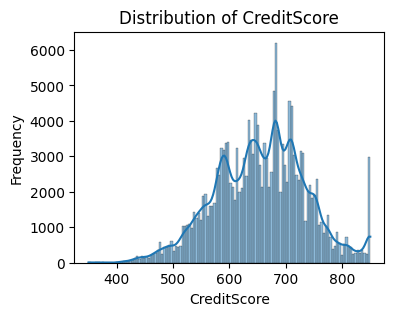

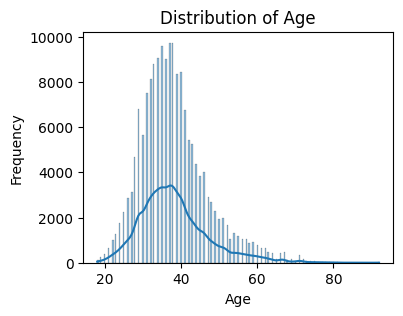

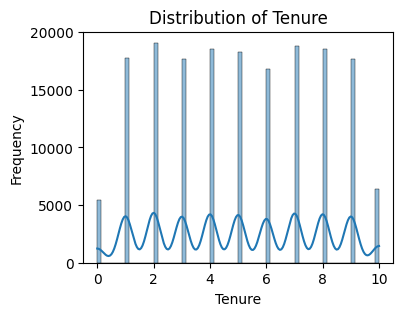

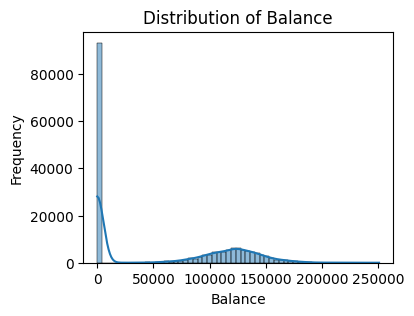

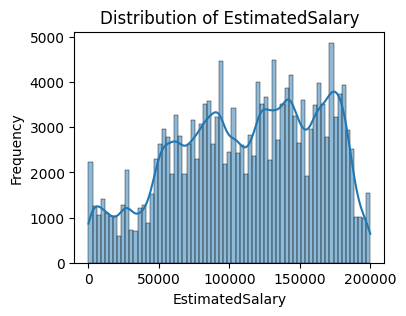

In [36]:
# Lets plot histogram to see the distribution of numerical features
for feature in numerical_features:
    plt.figure(figsize=(4,3))
    sns.histplot(new_train[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Observations**
- `CreditScore` looks fairly distributed with maximum Customers lying towards the centre of the bell curve.
- `Age` has few outliers on the Right Side of the Curve.
- `Tenure` feature is fairly balanced except few extra Customers with 0 and 10 tenure.
- `Balance` feature is higly skewed with almost 50% of the Customers having 0 balance.


In [37]:
# Now let's look at the Categorical Features
categorical_features

['Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'NumOfProducts']

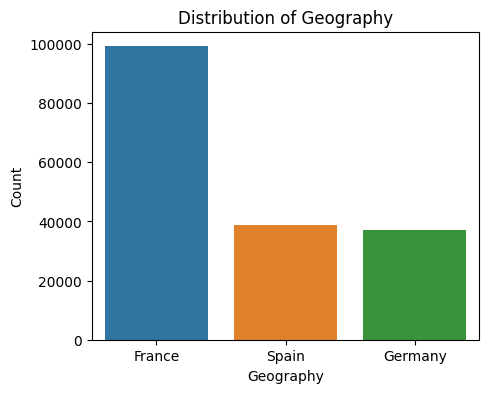

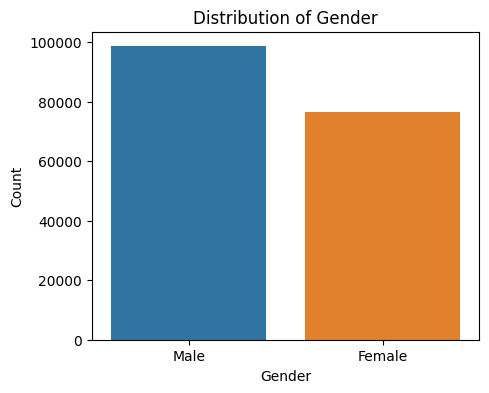

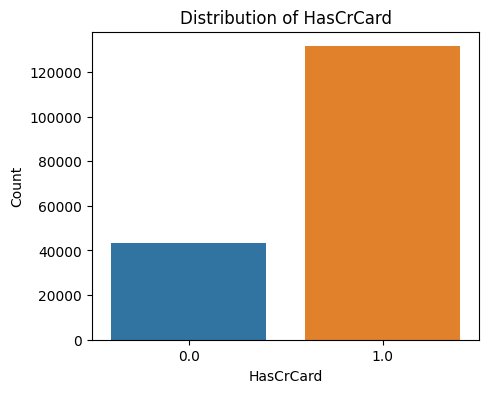

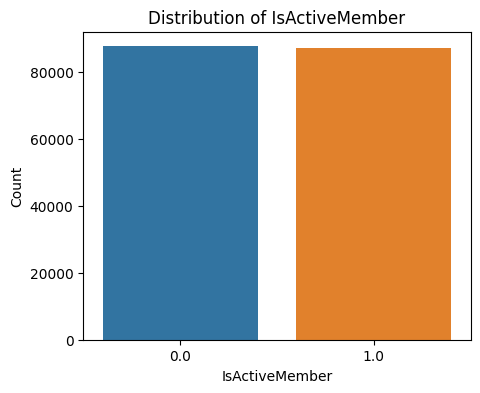

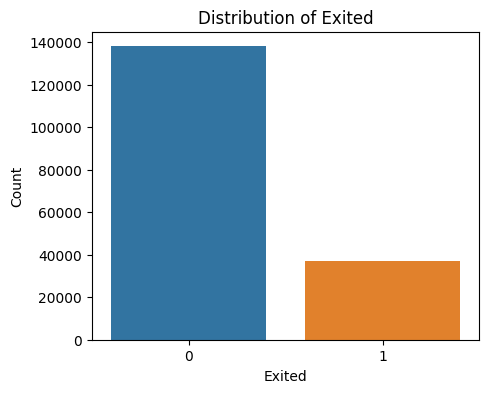

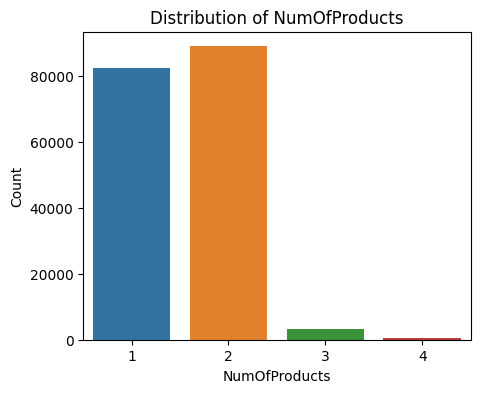

In [38]:
# Let's plot count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=new_train, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**Observations**
- Most of our Customers are from `France` followed by `Spain and Germany`.
- `Gender Distribution` : Males are sligtly more in number compare to Females.
- 75% of people in our Dataset `HasCrCard` rest 25% doesn't own a credit card.
- Our Output Feature is imbalanced. `Ratio of Customers who have churned >> not churned.`
-`NumOfProducts` :Most of our Customers either own 1 or 2 products and very less 3 or 4 products.

#### Bi-variate Analysis

In [39]:
# Let's do some bi-variate analysis

In [40]:
new_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [41]:
# Age Vs Balance

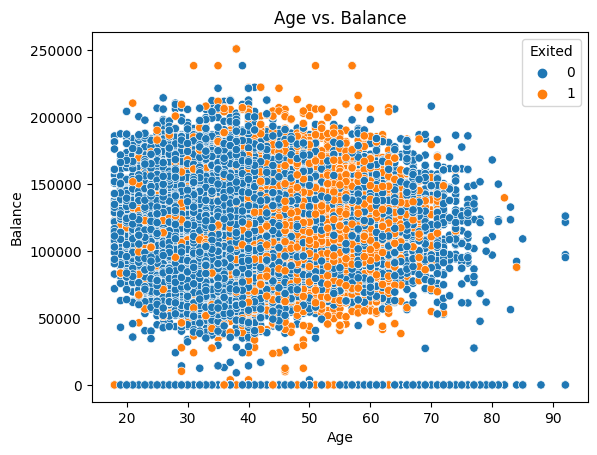

In [42]:
# Let's plot a Scatterplot
sns.scatterplot(data=new_train,x='Age',y='Balance',hue='Exited')
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [43]:
# CreditScore Vs NumOfProducts

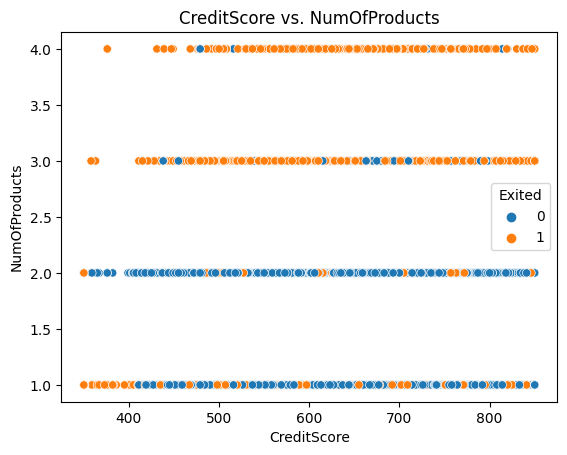

In [44]:
sns.scatterplot(data=new_train,x='CreditScore', y='NumOfProducts', hue='Exited')
plt.title('CreditScore vs. NumOfProducts')
plt.xlabel('CreditScore')
plt.ylabel('NumOfProducts')
plt.show()

**Observation**
- People having No of products 3 or greater have a higher chance of Exiting.
- People having 1 product and very less credit score have also high chance of exiting.

In [45]:
# Geography and Gender Distribution

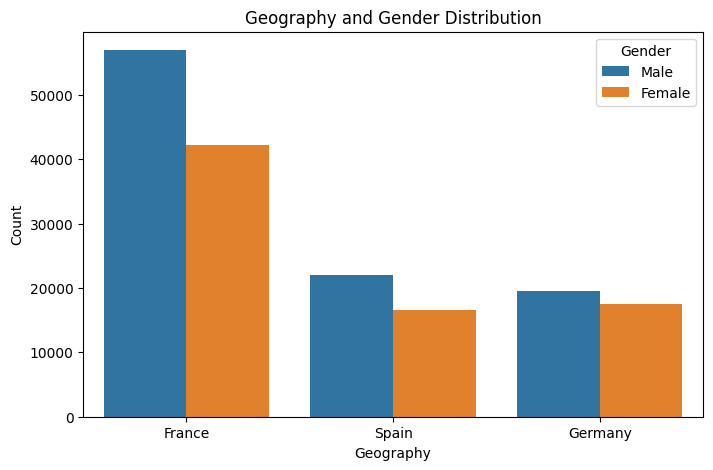

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Gender', data=new_train)
plt.title('Geography and Gender Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [47]:
# Age Distribution with Exited Overlay

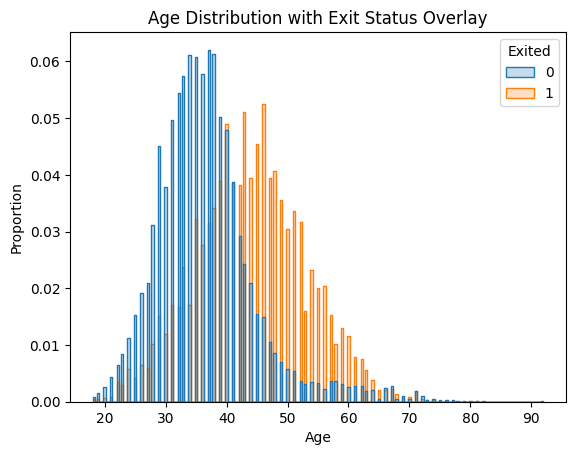

In [48]:
sns.histplot(x='Age', hue='Exited', data=new_train, element='step', stat='probability', common_norm=False)
plt.title('Age Distribution with Exit Status Overlay')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()

In [49]:
# Let's look at the co-relation matrix

In [50]:
new_train['CreditScore'].dtype

dtype('int64')

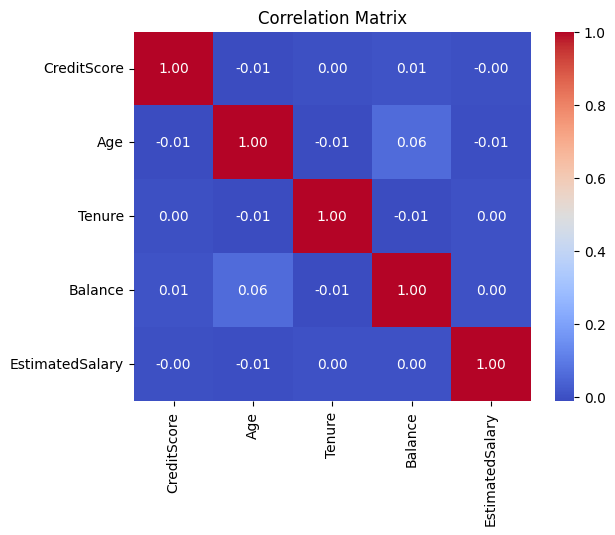

In [51]:
correlation_matrix = new_train[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 6.Feature Engineering and Data Preparation

In [52]:
new_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### 6.1 Feature Engineering

In [53]:
# Let's Create a Balance-to-Salary Ratio
new_train['BalanceSalaryRatio'] = new_train['Balance'] / new_train['EstimatedSalary']

In [54]:
#Customer Tenure Ratio
new_train['TenureAgeRatio'] = new_train['Tenure'] / new_train['Age']

In [55]:
# Create a new feature whether a person is active by Credit Card
new_train['IsActive_by_CreditCard'] = new_train['HasCrCard'] * new_train['IsActiveMember']

In [56]:
# Lets Use One Hot Encoding for our Categorical Features
train_encoded = pd.get_dummies(new_train, columns=['Geography', 'Gender'],dtype=int)
train_encoded.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.090909,0.0,1,0,0,0,1
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.030303,1.0,1,0,0,0,1
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.250000,0.0,1,0,0,0,1
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655,0.058824,1.0,1,0,0,0,1
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.151515,1.0,0,0,1,0,1


In [57]:
train_encoded.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'BalanceSalaryRatio', 'TenureAgeRatio',
       'IsActive_by_CreditCard', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [58]:
# Let's use Log tranformation for our higly skewed features features
train_encoded['Log_Balance'] = np.log1p(train_encoded['Balance'])
train_encoded['Log_EstimatedSalary'] = np.log1p(train_encoded['EstimatedSalary'])

In [59]:
train_encoded.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Log_Balance,Log_EstimatedSalary
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,...,0.000000,0.090909,0.0,1,0,0,0,1,0.00000,12.108741
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,...,0.000000,0.030303,1.0,1,0,0,0,1,0.00000,10.809819
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,...,0.000000,0.250000,0.0,1,0,0,0,1,0.00000,12.127396
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,...,1.760655,0.058824,1.0,1,0,0,0,1,11.91092,11.345239
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,...,0.000000,0.151515,1.0,0,0,1,0,1,0.00000,9.620450


## 7.Modelling

In [60]:
# Let's drop id,CustomerId and Surname before Modelling
train_encoded.drop(['id','CustomerId','Surname','Balance','EstimatedSalary'],axis=1,inplace=True)
train_encoded.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Log_Balance,Log_EstimatedSalary
0,668,33.0,3,2,1.0,0.0,0,0.000000,0.090909,0.0,1,0,0,0,1,0.00000,12.108741
1,627,33.0,1,2,1.0,1.0,0,0.000000,0.030303,1.0,1,0,0,0,1,0.00000,10.809819
2,678,40.0,10,2,1.0,0.0,0,0.000000,0.250000,0.0,1,0,0,0,1,0.00000,12.127396
3,581,34.0,2,1,1.0,1.0,0,1.760655,0.058824,1.0,1,0,0,0,1,11.91092,11.345239
4,716,33.0,5,2,1.0,1.0,0,0.000000,0.151515,1.0,0,0,1,0,1,0.00000,9.620450


In [61]:
train_encoded.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Log_Balance,Log_EstimatedSalary
0,668,33.0,3,2,1.0,0.0,0,0.000000,0.090909,0.0,1,0,0,0,1,0.00000,12.108741
1,627,33.0,1,2,1.0,1.0,0,0.000000,0.030303,1.0,1,0,0,0,1,0.00000,10.809819
2,678,40.0,10,2,1.0,0.0,0,0.000000,0.250000,0.0,1,0,0,0,1,0.00000,12.127396
3,581,34.0,2,1,1.0,1.0,0,1.760655,0.058824,1.0,1,0,0,0,1,11.91092,11.345239
4,716,33.0,5,2,1.0,1.0,0,0.000000,0.151515,1.0,0,0,1,0,1,0.00000,9.620450


In [62]:
#Lets Split our dataset into train and test
x = train_encoded.drop(['Exited'],axis=1)
y = train_encoded['Exited']

In [63]:
# Let's use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

In [65]:
x_train.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Log_Balance,Log_EstimatedSalary
229780,613,43.35937,8,1,0.320315,0.0,2.133110,0.184591,0.0,0,1,0,1,0,11.730835,10.992177
114937,696,28.00000,4,1,0.000000,1.0,1.482314,0.142857,0.0,1,0,0,0,1,12.059009,11.665407
139498,674,31.00000,4,1,1.000000,0.0,0.000000,0.129032,0.0,0,0,1,0,1,0.000000,12.063510
19092,761,34.00000,3,1,1.000000,0.0,0.791607,0.088235,0.0,0,0,1,0,1,11.662214,11.895902
132490,681,37.00000,8,1,1.000000,0.0,1.177897,0.216216,0.0,0,1,0,1,0,11.868531,11.704802


In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(207108, 16)
(69036, 16)
(207108,)
(69036,)


> Lets define a function for Checking Model Accuracy,Classification Report,Confusion Matrix and ROC_AUC Score.

In [67]:
def model_eval(actual, predicted, predicted_proba=None):
    acc_score = accuracy_score(actual, predicted)
    conf_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)

    print('Model Accuracy is: ', round(acc_score, 2))
    print(conf_matrix)
    print(clas_rep)

    if predicted_proba is not None:
        roc_auc = roc_auc_score(actual, predicted_proba[:, 1])
        print('ROC-AUC Score is: ', round(roc_auc, 2))


#### 7.1 Light Gradient Boosting

In [68]:
# Let's build our basic LightGradientBoosting Model and fit
from lightgbm import LGBMClassifier 
lgb = LGBMClassifier(random_state=42)
lgb.fit(x_train,y_train)

LGBMClassifier(random_state=42)

In [69]:
preds_lgb_train = lgb.predict(x_train)
preds_lgb_test = lgb.predict(x_test)

In [70]:
# Use predict_proba to get predicted probabilities for the positive class(Class 1)
preds_lgb_train_proba = lgb.predict_proba(x_train)
preds_lgb_test_proba = lgb.predict_proba(x_test)

In [71]:
model_eval(y_train,preds_lgb_train,preds_lgb_train_proba)

Model Accuracy is:  0.9
[[96452  7102]
 [12699 90855]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91    103554
           1       0.93      0.88      0.90    103554

    accuracy                           0.90    207108
   macro avg       0.91      0.90      0.90    207108
weighted avg       0.91      0.90      0.90    207108

ROC-AUC Score is:  0.97


In [72]:
model_eval(y_test,preds_lgb_test,preds_lgb_test_proba)

Model Accuracy is:  0.9
[[32211  2307]
 [ 4308 30210]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     34518
           1       0.93      0.88      0.90     34518

    accuracy                           0.90     69036
   macro avg       0.91      0.90      0.90     69036
weighted avg       0.91      0.90      0.90     69036

ROC-AUC Score is:  0.97


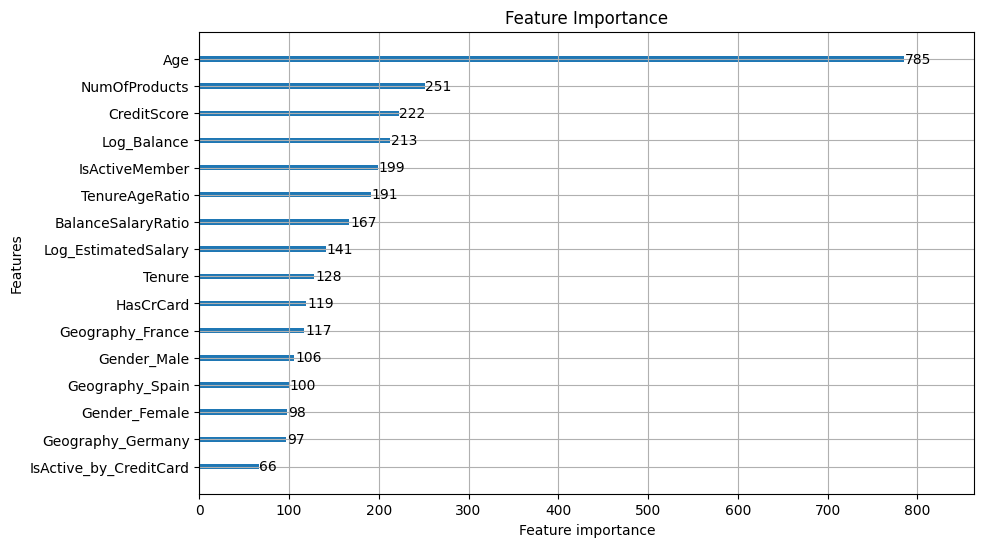

In [73]:
from lightgbm import plot_importance
plot_importance(lgb, figsize=(10, 6), title='Feature Importance', importance_type='split')
plt.show()

#### 7.2 Categorical Boost Classifier

In [74]:
#Let's import CatBoostClassifier
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(verbose=False) 
cat_boost.fit(x_train, y_train)

In [75]:
preds_cat_boost_train = cat_boost.predict(x_train)
preds_cat_boost_test = cat_boost.predict(x_test)

In [76]:
# Use predict_proba to get predicted probabilities for the positive class(Class 1)
preds_train_cat_boost_proba = cat_boost.predict_proba(x_train)
preds_test_cat_boost_proba = cat_boost.predict_proba(x_test)

In [77]:
model_eval(y_train, preds_cat_boost_train,preds_train_cat_boost_proba)

Model Accuracy is:  0.92
[[98309  5245]
 [11577 91977]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    103554
           1       0.95      0.89      0.92    103554

    accuracy                           0.92    207108
   macro avg       0.92      0.92      0.92    207108
weighted avg       0.92      0.92      0.92    207108

ROC-AUC Score is:  0.97


In [78]:
model_eval(y_test,preds_cat_boost_test,preds_test_cat_boost_proba)

Model Accuracy is:  0.91
[[32549  1969]
 [ 4256 30262]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     34518
           1       0.94      0.88      0.91     34518

    accuracy                           0.91     69036
   macro avg       0.91      0.91      0.91     69036
weighted avg       0.91      0.91      0.91     69036

ROC-AUC Score is:  0.97


#### 7.3 XGBoost

In [79]:
import xgboost as xgb

In [80]:
xgclf = xgb.XGBRFClassifier(objective='binary:logistic', random_state=42)
xgclf.fit(x_train,y_train)
preds_xgb_train = xgclf.predict(x_train)
preds_xgb_test = xgclf.predict(x_test)

In [81]:
preds_xgb_proba_train = xgclf.predict_proba(x_train)
preds_xgb_proba_test = xgclf.predict_proba(x_test)

In [82]:
model_eval(y_train,preds_xgb_train,preds_xgb_proba_train)

Model Accuracy is:  0.85
[[89177 14377]
 [16279 87275]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85    103554
           1       0.86      0.84      0.85    103554

    accuracy                           0.85    207108
   macro avg       0.85      0.85      0.85    207108
weighted avg       0.85      0.85      0.85    207108

ROC-AUC Score is:  0.94


In [83]:
model_eval(y_test,preds_xgb_test,preds_xgb_proba_test)

Model Accuracy is:  0.85
[[29770  4748]
 [ 5418 29100]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     34518
           1       0.86      0.84      0.85     34518

    accuracy                           0.85     69036
   macro avg       0.85      0.85      0.85     69036
weighted avg       0.85      0.85      0.85     69036

ROC-AUC Score is:  0.94


## 8. Hyperparameter Tuning

In [84]:
#We can try and do some hyperparameter tuning to select the best parameters for LightGradientBoost,CatBoost and XGB

In [85]:
#Lets import RandomisedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Let's define param grid for LGBM
lgbm_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
}

In [87]:
# Create a RandomizedSearchCV object for LightGBM
lgbm_random_search = RandomizedSearchCV(
    lgb,
    param_distributions=lgbm_param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose= 0,
    n_jobs=-1,
    random_state=42,
)

In [88]:
# Fit the LightGBM RandomizedSearchCV on train data
lgbm_random_search.fit(x_train, y_train)

best_lgbm_model = lgbm_random_search.best_estimator_

#### 8.2 CatBoost

In [89]:
# Let's define the parameter grid for CatBoost
catboost_param_dist = {
    'iterations': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
}


In [90]:
# Create a RandomizedSearchCV object for CatBoost
catboost_random_search = RandomizedSearchCV(
    cat_boost,
    param_distributions=catboost_param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=0,
    n_jobs=-1,
    random_state=42,
)

In [91]:
# Fit the CatBoost RandomizedSearchCV on train data
catboost_random_search.fit(x_train, y_train)

best_catboost_model = catboost_random_search.best_estimator_

#### 8.3 XGBoost

In [92]:
# Let's Define the parameter grid for XGBoost
xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
}

In [93]:
# Let's Create a RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
    xgclf,
    param_distributions=xgb_param_dist,
    n_iter=10,  
    scoring='roc_auc',  
    cv=3,  
    verbose=1,
    n_jobs=-1, 
    random_state=42,
)

In [94]:
# Let's fit our Randomized search on our train data
xgb_random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=No...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e0f8ed82530>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0f8ed806a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0f900e5840>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e0f8ed81a20>},
                   random_state=42, scoring='roc_auc', verbose=1)

In [95]:
# Print the best parameters and the corresponding ROC-AUC score
print("Best Parameters: ", xgb_random_search.best_params_)
print("\nBest ROC-AUC Score: ", xgb_random_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.8421165132560784, 'learning_rate': 0.09803049874792026, 'max_depth': 9, 'n_estimators': 57, 'subsample': 0.5171942605576092}

Best ROC-AUC Score:  0.9547973523775158


In [96]:
best_xgb_model = xgb_random_search.best_estimator_

#### 8.4 Voting Classifier

In [97]:
# I have used voting classifer to combine the predictions of the 3 models
from sklearn.ensemble import VotingClassifier

In [98]:
# Let's create a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lgb', best_lgbm_model),
        ('cat_boost', best_catboost_model),
        ('xgclf', best_xgb_model),
    ],
    voting='soft',
    verbose=0,
)


In [99]:
# Now let's fit the VotingClassifier on train data 
voting_clf.fit(x_train, y_train)
preds_best_train = voting_clf.predict(x_train)
preds_best_test = voting_clf.predict(x_test)

# Let's predict the probabilities
preds_proba_best_train = voting_clf.predict_proba(x_train)
preds_proba_best_test = voting_clf.predict_proba(x_test)


In [100]:
# Let's evaluate our Model on train data
model_eval(y_train,preds_best_train,preds_proba_best_train)

Model Accuracy is:  0.91
[[96805  6749]
 [12070 91484]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    103554
           1       0.93      0.88      0.91    103554

    accuracy                           0.91    207108
   macro avg       0.91      0.91      0.91    207108
weighted avg       0.91      0.91      0.91    207108

ROC-AUC Score is:  0.97


In [101]:
# Let's evaluate our Model on Test data
model_eval(y_test,preds_best_test,preds_proba_best_test)

Model Accuracy is:  0.91
[[32239  2279]
 [ 4171 30347]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     34518
           1       0.93      0.88      0.90     34518

    accuracy                           0.91     69036
   macro avg       0.91      0.91      0.91     69036
weighted avg       0.91      0.91      0.91     69036

ROC-AUC Score is:  0.97


## 9. Real Test Dataset

In [102]:
# Let's look at our Real test Dataset
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [103]:
df_test.isna().sum().any()

False

In [104]:
df_test['BalanceSalaryRatio'] = df_test['Balance'] / df_test['EstimatedSalary']
df_test['TenureAgeRatio'] = df_test['Tenure'] / df_test['Age']

In [105]:
df_test['IsActive_by_CreditCard'] = df_test['HasCrCard']* df_test['IsActiveMember']

In [106]:
test_encoded = pd.get_dummies(df_test, columns=['Geography', 'Gender'],dtype=int)
test_encoded.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,15773898,Lucchese,586,23.0,2,0.00,2,0.0,1.0,160976.75,0.000000,0.086957,0.0,1,0,0,1,0
1,165035,15782418,Nott,683,46.0,2,0.00,1,1.0,0.0,72549.27,0.000000,0.043478,0.0,1,0,0,1,0
2,165036,15807120,K?,656,34.0,7,0.00,2,1.0,0.0,138882.09,0.000000,0.205882,0.0,1,0,0,1,0
3,165037,15808905,O'Donnell,681,36.0,8,0.00,1,1.0,0.0,113931.57,0.000000,0.222222,0.0,1,0,0,0,1
4,165038,15607314,Higgins,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0.869703,0.263158,0.0,0,1,0,0,1


In [107]:
# Let's use Log Tranformation for our skewed features features
test_encoded['Log_Balance'] = np.log1p(test_encoded['Balance'])
test_encoded['Log_EstimatedSalary'] = np.log1p(test_encoded['EstimatedSalary'])

In [108]:
id = test_encoded['id']

In [109]:
# Let's drop features 
test_encoded.drop(['id','CustomerId','Surname','Balance','EstimatedSalary'],axis=1,inplace=True)

In [110]:
x_train.columns == test_encoded.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [111]:
test_encoded.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Log_Balance,Log_EstimatedSalary
0,586,23.0,2,2,0.0,1.0,0.000000,0.086957,0.0,1,0,0,1,0,0.00000,11.989021
1,683,46.0,2,1,1.0,0.0,0.000000,0.043478,0.0,1,0,0,1,0,0.00000,11.192035
2,656,34.0,7,2,1.0,0.0,0.000000,0.205882,0.0,1,0,0,1,0,0.00000,11.841388
3,681,36.0,8,1,1.0,0.0,0.000000,0.222222,0.0,1,0,0,0,1,0.00000,11.643362
4,752,38.0,10,1,1.0,0.0,0.869703,0.263158,0.0,0,1,0,0,1,11.70573,11.845332


In [112]:
# Let's predict using our Voting Classifier
predictions = voting_clf.predict_proba(test_encoded)[:, 1]

In [113]:
# Let's look at the submission Dataset
df_sub.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [114]:
# Let's create a DataFrame for submission
submission_df = pd.DataFrame({'id': id, 'Exited': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [115]:
# Let's look at our Submission Dataframe
submission_df.head()

,id,Exited
0,165034,0.167256
1,165035,0.784152
2,165036,0.180470
3,165037,0.399118
4,165038,0.446667


`If you like this Notebook Please Upvote`
            `Thankyou and Happy Learning..!!`